In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/machineHack/predict flight price/Data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [ ]:
import numpy as np
import pandas as pd
import tensorflow
import keras
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_excel('/content/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
test = pd.read_excel('/content/Flight_Ticket_Participant_Datasets/Test_set.xlsx')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
for i in train.columns:
    print("Unique values in", i, train[i].nunique(),"values",train[i].unique())

Unique values in Airline 12 values ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Unique values in Date_of_Journey 44 values ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Unique values in Source 5 values ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Unique values in Destination 6 values ['New Delhi' 'Banglore' 'Cochin' 'Kolkata'

In [ ]:
for i in test.columns:
    print("Unique values in", i, test[i].nunique())

Unique values in Airline 11
Unique values in Date_of_Journey 44
Unique values in Source 5
Unique values in Destination 6
Unique values in Route 100
Unique values in Dep_Time 199
Unique values in Arrival_Time 704
Unique values in Duration 320
Unique values in Total_Stops 5
Unique values in Additional_Info 6


In [ ]:
# storing number of rows as an a variable for later use
len_train=train.shape[0]

In [ ]:
#coalescing the two columns for data treatment
train=train.append(test)
train=train.reset_index()
train=train.drop('index',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

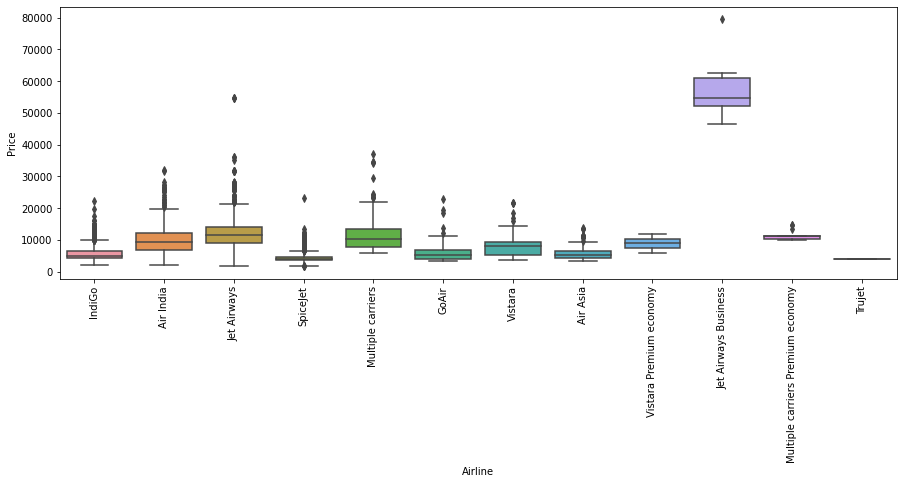

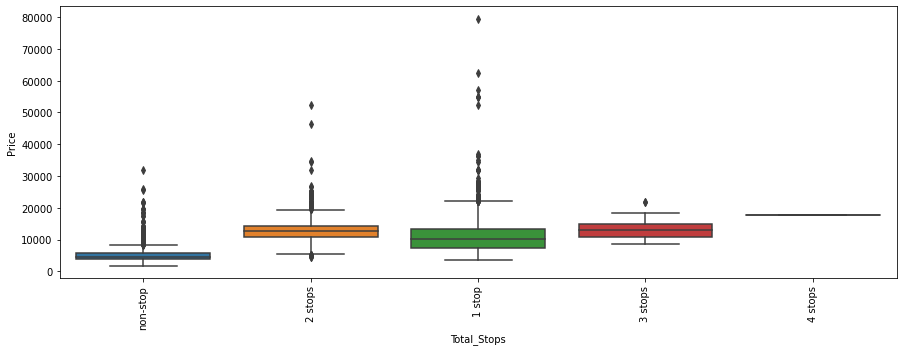

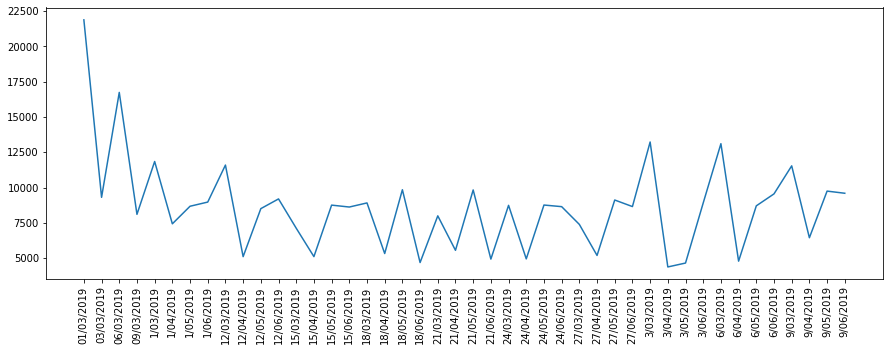

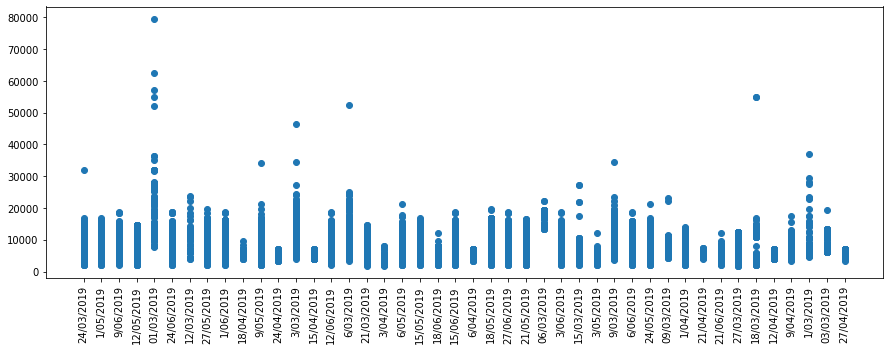

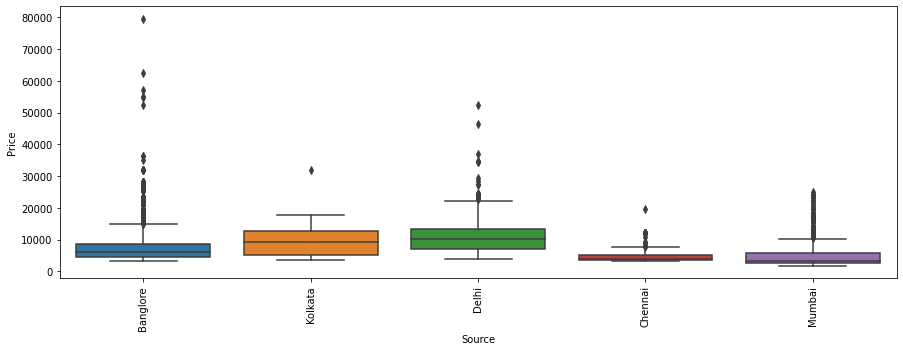

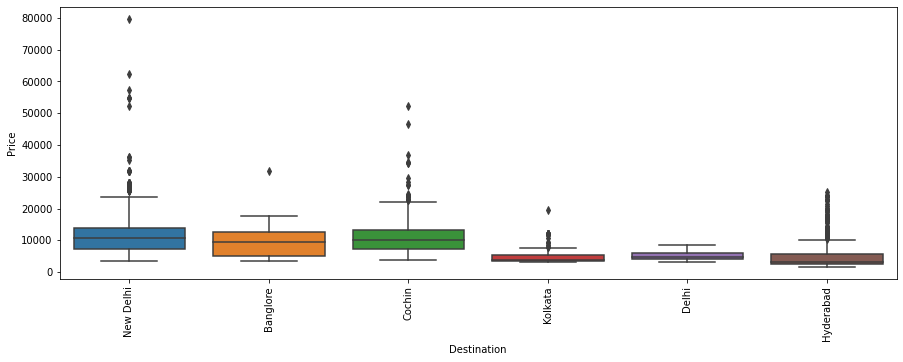

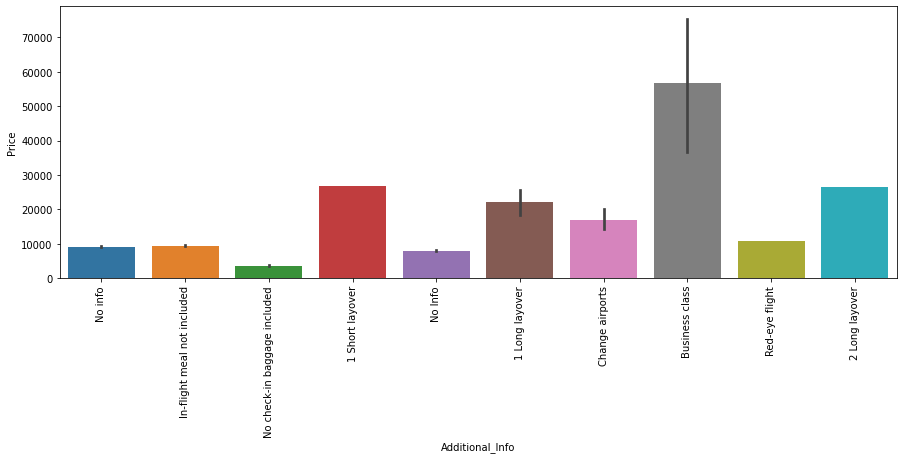

In [ ]:
#Visually understanding the variation of price with different columns
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Airline, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Total_Stops, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.plot(train.sort_values(['Date_of_Journey']).Date_of_Journey.unique(), train.groupby(['Date_of_Journey']).mean())

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.scatter(train.Date_of_Journey, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Source, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Destination, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train.Additional_Info, train.Price )

**Data Treatment and feature Generation**

In [ ]:
# Converting Dep_Time from object (string) to time format
train.Dep_Time=pd.to_datetime(train.Dep_Time, format= '%H:%M').dt.time

In [ ]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302.0


In [ ]:
# Converting date of journey to date format
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.date

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302.0


In [ ]:
# Converting duration from string to integer value in minutes
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')
hour=train['Duration'].str.extract('(\d+)').astype('int')
minute=minute.fillna(0) #filling up minute= 0 where the flight duration only had hours
train['Duration']=minute.astype('int')+hour*60

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,non-stop,No info,3897.0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2 stops,No info,7662.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2 stops,No info,13882.0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1 stop,No info,6218.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1 stop,No info,13302.0


In [ ]:
# Creating column date of arrival by adding date and time of journey with duration in minutes
train['Date_of_Arrival']=train.apply(lambda r : pd.datetime.combine(r['Date_of_Journey'],r['Dep_Time']),1) + pd.to_timedelta(train.Duration,unit='m')
train['Date_of_Arrival']=train.Date_of_Arrival.dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,non-stop,No info,3897.0,2019-03-25
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2 stops,No info,7662.0,2019-05-01
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2 stops,No info,13882.0,2019-06-10
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1 stop,No info,6218.0,2019-05-12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1 stop,No info,13302.0,2019-03-01


In [ ]:
# Changing Total Stops from a string value to a categorical value 
train.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [ ]:
dic={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops': 4}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [ ]:
# Creating a column a categorical column class from the column Airline 
r=train.Airline.str.split(' ',expand=True).get(2)
d={None:'Economy','Premium': 'Premium Economy','economy':'Premium Economy','Business':'Business' }
r=r.map(d)
train['Class']=r
train.Class=train.Class.astype('category')

In [ ]:
# The column Additional info had values No info and No Info stored, editing to bring them to the same string value
train.loc[train.Additional_Info=="No info",'Additional_Info']="No Info"

In [ ]:
# Creating an integer column same_day_travel that highlights whether the flight was arrived the same day, a day from dep, or more..
train['Same_day_travel']=train.Date_of_Arrival-train.Date_of_Journey
train['Same_day_travel']=train.Same_day_travel.astype('category')

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Class,Same_day_travel
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,3897.0,2019-03-25,Economy,1 days
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,7662.0,2019-05-01,Economy,0 days
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,13882.0,2019-06-10,Economy,1 days
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,6218.0,2019-05-12,Economy,0 days
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,13302.0,2019-03-01,Economy,0 days


In [ ]:
#Converting Airline to category as price varies with airlines ( Category column helps in tree based modelling)
train.Airline=train.Airline.astype('category')

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Class,Same_day_travel
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,3897.0,2019-03-25,Economy,1 days
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,7662.0,2019-05-01,Economy,0 days
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,13882.0,2019-06-10,Economy,1 days
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,6218.0,2019-05-12,Economy,0 days
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,13302.0,2019-03-01,Economy,0 days


In [ ]:
# Creating 2 columns weekday journey and weekday arrival that highligh what day of the week the flight took off and arrived
# respectively. The idea is that the price will be marginally higher on weekends and this metric can help catch that.
train['weekday_journey']=train['Date_of_Journey'].apply(lambda x: x.weekday())
train['weekday_arrival']=train['Date_of_Arrival'].apply(lambda x: x.weekday())

In [ ]:
train[:5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Class,Same_day_travel,weekday_journey,weekday_arrival
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,3897.0,2019-03-25,Economy,1 days,6,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,7662.0,2019-05-01,Economy,0 days,2,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,13882.0,2019-06-10,Economy,1 days,6,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,6218.0,2019-05-12,Economy,0 days,6,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,13302.0,2019-03-01,Economy,0 days,4,4


In [ ]:
# Creating columns for year, month, and day of both departure and arrival as integers to be able to better 
# capture any seasonality due to date
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['month_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['month_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).month
train['day_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).day
train['day_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).day

**Target Variable Normalization**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold
#from sklearn.linear_model import LassoCV , RidgeCV, ElasticNet, Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor  
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import datetime
from mlxtend.regressor import StackingCVRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


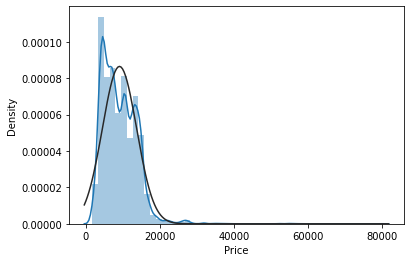

((array([-3.82690953, -3.60266143, -3.4795895 , ...,  3.4795895 ,
          3.60266143,  3.82690953]),
  array([ 1759.,  1759.,  1759., ..., 57209., 62427., 79512.])),
 (4364.062692425855, 9087.064120565383, 0.9460976378917301))

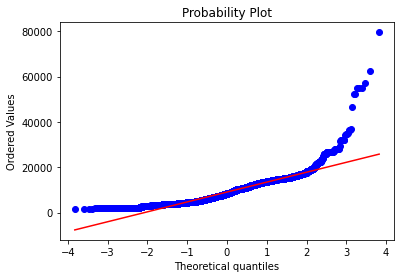

In [ ]:
sns.distplot(train[:len_train].Price, fit=stats.norm)
l=plt.show()
stats.probplot(train[:len_train].Price,plot=plt )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


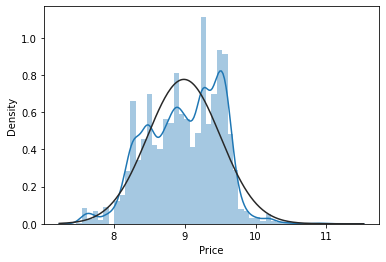

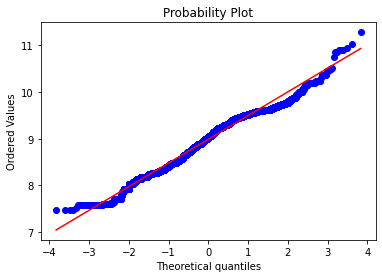

In [ ]:
xt=np.log(train[:len_train].Price)
sns.distplot(xt, fit=stats.norm)
l=plt.show()
stats.probplot(xt,plot=plt )

train.Price=np.log(train.Price)

**Null Value Treatment**

In [ ]:
##Identifying columns with missing values
train.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            1
Additional_Info        0
Price               2671
Date_of_Arrival        0
Class                  0
Same_day_travel        0
weekday_journey        0
weekday_arrival        0
Year                   0
month_of_journey       0
month_of_Arrival       0
day_of_Arrival         0
day_of_journey         0
dtype: int64

In [ ]:
# Filtering data with missing value and filling up with appropriate values as determined
train.loc[(train.Source=='Delhi') & (train.Destination=='Cochin') & (pd.DatetimeIndex(train['Date_of_Journey']).month==5)& (train.Duration==1420) &(train.Airline=='Air India') ].sort_values(['Date_of_Journey'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Class,Same_day_travel,weekday_journey,weekday_arrival,Year,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,NaN,No Info,8.919988,2019-05-07,Economy,1 days,0,1,2019,5,5,7,6
10348,Air India,2019-05-09,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,9.202812,2019-05-10,Economy,1 days,3,4,2019,5,5,10,9
12318,Air India,2019-05-09,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,NaN,2019-05-10,Economy,1 days,3,4,2019,5,5,10,9
2343,Air India,2019-05-15,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,9.303375,2019-05-16,Economy,1 days,2,3,2019,5,5,16,15
2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,8.919988,2019-05-16,Economy,1 days,2,3,2019,5,5,16,15
3595,Air India,2019-05-18,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,9.032648,2019-05-19,Economy,1 days,5,6,2019,5,5,19,18
9717,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,9.303375,2019-05-19,Economy,1 days,5,6,2019,5,5,19,18
8135,Air India,2019-05-21,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No Info,9.303375,2019-05-22,Economy,1 days,1,2,2019,5,5,22,21
1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No Info,8.919988,2019-05-25,Economy,1 days,4,5,2019,5,5,25,24


In [ ]:
train.Route=train.Route.fillna('DEL → MAA → COK')
train.loc[train.Total_Stops.isnull(),'Total_Stops']=1

**Outlier Treatment- Did not Use for modelling**

In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Class,Same_day_travel,weekday_journey,weekday_arrival,Year,month_of_journey,month_of_Arrival,day_of_Arrival,day_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0.0,No Info,8.267962,2019-03-25,Economy,1 days,6,0,2019,3,3,25,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2.0,No Info,8.944028,2019-05-01,Economy,0 days,2,2,2019,5,5,1,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2.0,No Info,9.538348,2019-06-10,Economy,1 days,6,0,2019,6,6,10,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1.0,No Info,8.735204,2019-05-12,Economy,0 days,6,6,2019,5,5,12,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1.0,No Info,9.495670,2019-03-01,Economy,0 days,4,4,2019,3,3,1,1


**Skew Treatment (BOXCOX Transform)**

In [ ]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train.columns:
    if i!='Price':
        if train[i].dtype in numeric_dtypes: 
            numerics2.append(i)

skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
print(skews)

high_skew = skew_features[abs(skew_features) > 0.3]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
     if i!='=Price':
        train[i]= boxcox1p(train[i], boxcox_normmax(train[i]+1))

        
skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2

                      skew
Duration          0.867995
day_of_journey    0.135127
day_of_Arrival    0.132062
weekday_journey   0.040376
weekday_arrival   0.030020
Year              0.000000
month_of_Arrival -0.390640
month_of_journey -0.390640


,skew
day_of_journey,0.135127
day_of_Arrival,0.132062
Duration,0.054899
weekday_journey,0.040376
weekday_arrival,0.030020
Year,0.000000
month_of_Arrival,-0.105846
month_of_journey,-0.105846


**Data preperation for Modelling and Modelling**

In [ ]:
# Creating a sparse matrix using pandas get dummies function that helps split string columns into boolean values.
df=pd.get_dummies(train)

In [ ]:
# Splitting test and train data
train_df=df[:len_train]
test_df=df[len_train:]

In [ ]:
# Removing Price from independent variable data and keeping only price in the other
x=train_df.drop('Price',axis=1)
y=train_df['Price']

In [ ]:
# Writing a function to evaluate model performance using KFOLD and cross validation
def rmsle_cv(model):
    kfold=KFold(n_splits=2, shuffle=True, random_state=10).get_n_splits(x)
    rmse=np.sqrt(-cross_val_score(model,x,y,cv=kfold, scoring='neg_mean_squared_error'))
    return rmse

In [ ]:
'''
lightgbm=LGBMRegressor(objective='regression',num_leaves=80,
                              learning_rate=0.1, n_estimators=1200,
                              max_bin = 30, bagging_fraction = 0.8,
                              bagging_freq = 9, feature_fraction = 0.129,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 6, random_state=10)
                              '''

"\nlightgbm=LGBMRegressor(objective='regression',num_leaves=80,\n                              learning_rate=0.1, n_estimators=1200,\n                              max_bin = 30, bagging_fraction = 0.8,\n                              bagging_freq = 9, feature_fraction = 0.129,\n                              feature_fraction_seed=9, bagging_seed=9,\n                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 6, random_state=10)\n                              "

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'num_leaves': [20,40,60,80], 'learning_rate': [0.05, 0.01,0.1], 'max_features': ['auto', 'log2'], 'n_estimators': [500,700,1200,1500]}

In [ ]:
rfr = LGBMRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
#g_search.fit(x, y);

In [ ]:
#print(g_search.best_params_)

In [ ]:
lightgbm=LGBMRegressor(objective='regression',num_leaves=80,
                              learning_rate=0.05, n_estimators=1200,
                              max_bin = 30 , max_features='auto', random_state=10)

In [ ]:
#rmsle_cv(lightgbm).mean(),rmsle_cv(lightgbm).std() # Commented for faster running of complete code

In [ ]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=1500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [ ]:
#rmsle_cv(xgb).mean(),rmsle_cv(xgb).std() # Commented for faster running of complete code

In [ ]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=400, max_depth=12
                              ,subsample=0.8,
                              verbose=False,random_state=10)


In [ ]:
#rmsle_cv(grb).mean(), rmsle_cv(grb).std() # Commented for faster running of complete code

In [ ]:
svr = Pipeline([('Scaler',RobustScaler()), ('SVR',SVR(C= 10000, epsilon= 0.008, gamma=0.009))])

In [ ]:
#rmsle_cv(svr).mean(), rmsle_cv(svr).std() # Commented for faster running of complete code

In [ ]:

krr=KernelRidge(alpha=1, kernel='polynomial', gamma=0.001,degree=3,coef0=5)
#rmsle_cv(krr).mean(), rmsle_cv(krr).std() # Commented for faster running of complete code

In [ ]:
rf=RandomForestRegressor(n_estimators=3000, oob_score = False, n_jobs = -1,random_state =50,
                         max_features = "auto", min_samples_leaf = 2,warm_start=True,criterion='mse',max_depth=50)

In [ ]:
#rmsle_cv(rf).mean(), rmsle_cv(rf).std() # Commented for faster running of complete code

In [ ]:
# Final ensemble that uses outputs from each model regressor and the original data in the meta regressor XGB
avg=StackingCVRegressor(regressors=(lightgbm,grb,rf),meta_regressor=xgb, use_features_in_secondary=True)#,svr,krr,

In [ ]:
# Function to calculate RMSE error of the complete model for reference, similiar to rmsle_cv without KFOLD CV
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:

X=np.array(x)
Y=np.array(y)

In [ ]:
# Fitting the model on the train data and predicting the train price values
avg.fit(X,Y)
y_pred=avg.predict(X)

[05:05:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


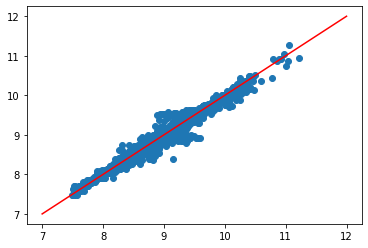

In [ ]:
# Plot of the model prediction with the original price values in the training data set to undestand model fit
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')

In [ ]:
# RMSE value of the model on training data
rmsle(y,y_pred)

0.05882558111761175

In [ ]:
# Predictions of test data
Predict=avg.predict(np.array(test_df.drop('Price',axis=1)))

In [ ]:
# Converting price back to original scale and making it integer
Predict=np.exp(Predict)
Predict=Predict.astype(int)

In [ ]:

# Converting predicted values to dataframe
Submission=pd.DataFrame(Predict,columns=['Price'])

In [ ]:
len(Submission)

2671

In [ ]:
Submission.head()

,Price
0,14663
1,4321
2,12919
3,8732
4,3682


In [ ]:
# Final Submission
Submission.to_excel('Submission_rf.xlsx')

In [ ]:
# Final Submission
Submission.to_csv('Submission_stacked.csv')